In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def create_plot(x=None, y=None, data=None, plot_type="line", xlabel="", ylabel="", title="", bins=30, color="b"):
    plt.figure(figsize=(10,5))

    if plot_type == "line":
        plt.plot(x, y, marker="o", linestyle="-", color=color)
    elif plot_type == "scatter":
        plt.scatter(x, y, color=color, alpha=0.7)
    elif plot_type == "hist":
        plt.hist(data, bins=bins, color=color, edgecolor="black")
    elif plot_type == "bar":
        plt.bar(x, y, color=color, edgecolor="black")
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


In [3]:
C = pd.read_csv("Customers.csv")
P = pd.read_csv("Products.csv")
T = pd.read_csv("Transactions.csv")

In [4]:
pt = T.merge(P, on = "ProductID")
ptc = pt.merge(C, on = "CustomerID")
ptc.rename(columns = {"Price_x" : "Price"}, inplace = True)
ptc.drop(columns = ["Price_y"], inplace=True)
ptc

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,ProductName,Category,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 8:30:27,1,459.86,459.86,SoundWave Smartwatch,Electronics,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 2:15:24,3,1379.58,459.86,SoundWave Smartwatch,Electronics,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,SoundWave Smartwatch,Electronics,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,SoundWave Smartwatch,Electronics,Joshua Hamilton,Asia,2024-11-11


In [5]:
(ptc.TransactionID).is_unique

True

In [6]:
(ptc.CustomerID).is_unique

False

In [7]:
(ptc.ProductID).is_unique

False

In [8]:
##total spending

In [9]:
total_spending = ptc.groupby("CustomerID")["TotalValue"].sum().reset_index()
total_spending.rename(columns={"TotalValue": "TotalSpending"}, inplace=True)
total_spending

,CustomerID,TotalSpending
0,C0001,3354.52
1,C0002,1862.74
2,C0003,2725.38
3,C0004,5354.88
4,C0005,2034.24
...,...,...
194,C0196,4982.88
195,C0197,1928.65
196,C0198,931.83
197,C0199,1979.28


In [10]:
## transaction count

In [11]:
transaction_count = ptc.groupby("CustomerID")["TransactionID"].count().reset_index()
transaction_count.rename(columns={"TransactionID": "TransactionCount"}, inplace=True)
transaction_count

,CustomerID,TransactionCount
0,C0001,5
1,C0002,4
2,C0003,4
3,C0004,8
4,C0005,3
...,...,...
194,C0196,4
195,C0197,3
196,C0198,2
197,C0199,4


In [12]:
## average spending per customer

In [13]:
avg_spending = total_spending.merge(transaction_count, on="CustomerID")
avg_spending["AvgSpendingPerTransaction"] = avg_spending["TotalSpending"] / avg_spending["TransactionCount"]
avg_spending 

,CustomerID,TotalSpending,TransactionCount,AvgSpendingPerTransaction
0,C0001,3354.52,5,670.904000
1,C0002,1862.74,4,465.685000
2,C0003,2725.38,4,681.345000
3,C0004,5354.88,8,669.360000
4,C0005,2034.24,3,678.080000
...,...,...,...,...
194,C0196,4982.88,4,1245.720000
195,C0197,1928.65,3,642.883333
196,C0198,931.83,2,465.915000
197,C0199,1979.28,4,494.820000


In [14]:
ptc

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,ProductName,Category,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 8:30:27,1,459.86,459.86,SoundWave Smartwatch,Electronics,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 2:15:24,3,1379.58,459.86,SoundWave Smartwatch,Electronics,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,SoundWave Smartwatch,Electronics,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,SoundWave Smartwatch,Electronics,Joshua Hamilton,Asia,2024-11-11


In [15]:
category_pref = ptc.groupby(["CustomerID", "Category"])["TotalValue"].sum().reset_index()
category_pref.head()

,CustomerID,Category,TotalValue
0,C0001,Books,114.60
1,C0001,Electronics,2827.30
2,C0001,Home Decor,412.62
3,C0002,Clothing,1025.46
4,C0002,Home Decor,837.28


In [16]:
category_pref = category_pref.loc[category_pref.groupby("CustomerID")["TotalValue"].idxmax()]
category_pref

,CustomerID,Category,TotalValue
1,C0001,Electronics,2827.30
3,C0002,Clothing,1025.46
6,C0003,Electronics,1385.20
10,C0004,Home Decor,2110.66
11,C0005,Electronics,1180.38
...,...,...,...
556,C0196,Home Decor,2086.85
558,C0197,Home Decor,1013.73
559,C0198,Clothing,904.84
562,C0199,Home Decor,1384.90


In [17]:
category_pref = category_pref[["CustomerID", "Category"]]
category_pref.rename(columns={"Category": "PreferredCategory"}, inplace=True)
category_pref

C:\Users\dell\AppData\Local\Temp\ipykernel_17092\88961229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_pref.rename(columns={"Category": "PreferredCategory"}, inplace=True)


,CustomerID,PreferredCategory
1,C0001,Electronics
3,C0002,Clothing
6,C0003,Electronics
10,C0004,Home Decor
11,C0005,Electronics
...,...,...
556,C0196,Home Decor
558,C0197,Home Decor
559,C0198,Clothing
562,C0199,Home Decor


In [18]:
# high value customers

In [19]:
total_spending

,CustomerID,TotalSpending
0,C0001,3354.52
1,C0002,1862.74
2,C0003,2725.38
3,C0004,5354.88
4,C0005,2034.24
...,...,...
194,C0196,4982.88
195,C0197,1928.65
196,C0198,931.83
197,C0199,1979.28


In [20]:
threshold = total_spending["TotalSpending"].quantile(0.8)
total_spending["classification"] = total_spending["TotalSpending"].apply(lambda x: "High Value" if x > threshold else "Regular")
high_value_count = total_spending[total_spending['classification'] == "High Value"].shape[0]
high_value_count

40

In [21]:
total_spending

,CustomerID,TotalSpending,classification
0,C0001,3354.52,Regular
1,C0002,1862.74,Regular
2,C0003,2725.38,Regular
3,C0004,5354.88,High Value
4,C0005,2034.24,Regular
...,...,...,...
194,C0196,4982.88,Regular
195,C0197,1928.65,Regular
196,C0198,931.83,Regular
197,C0199,1979.28,Regular


In [22]:
total_spending_1 = total_spending.merge(ptc, on="CustomerID")
total_spending_1

,CustomerID,TotalSpending,classification,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,ProductName,Category,CustomerName,Region,SignupDate
0,C0001,3354.52,Regular,T00015,P054,2024-01-19 3:12:55,2,114.60,57.30,SoundWave Cookbook,Books,Lawrence Carroll,South America,2022-07-10
1,C0001,3354.52,Regular,T00932,P022,2024-09-17 9:01:18,3,412.62,137.54,HomeSense Wall Art,Home Decor,Lawrence Carroll,South America,2022-07-10
2,C0001,3354.52,Regular,T00085,P096,2024-04-08 0:01:00,2,614.94,307.47,SoundWave Headphones,Electronics,Lawrence Carroll,South America,2022-07-10
3,C0001,3354.52,Regular,T00445,P083,2024-05-07 3:11:44,2,911.44,455.72,ActiveWear Smartwatch,Electronics,Lawrence Carroll,South America,2022-07-10
4,C0001,3354.52,Regular,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,TechPro Headphones,Electronics,Lawrence Carroll,South America,2022-07-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C0200,4758.60,Regular,T00518,P034,2024-12-11 3:05:50,4,868.20,217.05,HomeSense T-Shirt,Clothing,Kelly Cross,Asia,2023-06-11
996,C0200,4758.60,Regular,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70,ActiveWear Smartphone,Electronics,Kelly Cross,Asia,2023-06-11
997,C0200,4758.60,Regular,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96,HomeSense Desk Lamp,Home Decor,Kelly Cross,Asia,2023-06-11
998,C0200,4758.60,Regular,T00771,P048,2024-09-10 9:50:48,4,1665.60,416.40,TechPro Cookbook,Books,Kelly Cross,Asia,2023-06-11


In [23]:
total_spending_1

,CustomerID,TotalSpending,classification,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,ProductName,Category,CustomerName,Region,SignupDate
0,C0001,3354.52,Regular,T00015,P054,2024-01-19 3:12:55,2,114.60,57.30,SoundWave Cookbook,Books,Lawrence Carroll,South America,2022-07-10
1,C0001,3354.52,Regular,T00932,P022,2024-09-17 9:01:18,3,412.62,137.54,HomeSense Wall Art,Home Decor,Lawrence Carroll,South America,2022-07-10
2,C0001,3354.52,Regular,T00085,P096,2024-04-08 0:01:00,2,614.94,307.47,SoundWave Headphones,Electronics,Lawrence Carroll,South America,2022-07-10
3,C0001,3354.52,Regular,T00445,P083,2024-05-07 3:11:44,2,911.44,455.72,ActiveWear Smartwatch,Electronics,Lawrence Carroll,South America,2022-07-10
4,C0001,3354.52,Regular,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,TechPro Headphones,Electronics,Lawrence Carroll,South America,2022-07-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C0200,4758.60,Regular,T00518,P034,2024-12-11 3:05:50,4,868.20,217.05,HomeSense T-Shirt,Clothing,Kelly Cross,Asia,2023-06-11
996,C0200,4758.60,Regular,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70,ActiveWear Smartphone,Electronics,Kelly Cross,Asia,2023-06-11
997,C0200,4758.60,Regular,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96,HomeSense Desk Lamp,Home Decor,Kelly Cross,Asia,2023-06-11
998,C0200,4758.60,Regular,T00771,P048,2024-09-10 9:50:48,4,1665.60,416.40,TechPro Cookbook,Books,Kelly Cross,Asia,2023-06-11


In [24]:
## high value customers

In [25]:
high_value = total_spending_1[total_spending_1['classification'] == "High Value"]
high_value = high_value.sort_values(by="TotalValue", ascending=False)
high_value

,CustomerID,TotalSpending,classification,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,ProductName,Category,CustomerName,Region,SignupDate
393,C0082,7572.91,High Value,T00928,P075,2024-09-06 18:39:07,4,1991.04,497.76,TechPro Textbook,Books,Aimee Taylor,South America,2022-05-13
313,C0065,7663.70,High Value,T00499,P032,2024-07-18 2:51:22,4,1954.52,488.63,BookWorld Cookbook,Books,Gerald Hines,North America,2024-07-10
62,C0013,6000.56,High Value,T00503,P017,2024-07-26 0:21:59,4,1879.08,469.77,ActiveWear Textbook,Books,Lauren Buchanan,South America,2024-05-19
246,C0051,5699.57,High Value,T00070,P017,2024-12-11 13:46:30,4,1879.08,469.77,ActiveWear Textbook,Books,Nicholas Ellis,Europe,2023-12-21
857,C0171,5145.35,High Value,T00224,P017,2024-07-06 23:53:24,4,1879.08,469.77,ActiveWear Textbook,Books,Michael Cowan,South America,2022-12-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,C0165,6708.10,High Value,T00878,P044,2024-09-24 21:15:21,3,56.46,18.82,ActiveWear Running Shoes,Clothing,Juan Mcdaniel,South America,2022-04-09
262,C0054,8040.39,High Value,T00519,P073,2024-06-02 10:00:57,2,53.98,26.99,ComfortLiving Laptop,Electronics,Bruce Rhodes,Asia,2024-09-29
66,C0013,6000.56,High Value,T00399,P056,2024-03-28 19:16:21,3,48.24,16.08,SoundWave Smartwatch,Electronics,Lauren Buchanan,South America,2024-05-19
59,C0012,5231.26,High Value,T00353,P063,2024-10-22 21:55:48,1,33.59,33.59,TechPro Novel,Books,Kevin May,South America,2024-08-07


In [26]:
# high value customers name preffered product and category
high_value_cnppc = high_value[['Region', 'classification','CustomerID', 'CustomerName', 'ProductName','Category']].drop_duplicates(subset="CustomerID")
high_value_cnppc

,Region,classification,CustomerID,CustomerName,ProductName,Category
393,South America,High Value,C0082,Aimee Taylor,TechPro Textbook,Books
313,North America,High Value,C0065,Gerald Hines,BookWorld Cookbook,Books
62,South America,High Value,C0013,Lauren Buchanan,ActiveWear Textbook,Books
246,Europe,High Value,C0051,Nicholas Ellis,ActiveWear Textbook,Books
857,South America,High Value,C0171,Michael Cowan,ActiveWear Textbook,Books
55,South America,High Value,C0012,Kevin May,ComfortLiving Smartphone,Electronics
865,Asia,High Value,C0173,Francisco Young,ActiveWear Cookware Set,Home Decor
464,South America,High Value,C0096,Benjamin Mcclure,HomeSense Running Shoes,Clothing
884,Asia,High Value,C0175,Matthew Johnson,HomeSense Running Shoes,Clothing
735,South America,High Value,C0148,Matthew Rogers,HomeSense Cookware Set,Home Decor


In [27]:
#region wise count
region_hv = high_value_cnppc['Region'].value_counts()
region_hv

Region
South America    15
Asia             11
North America     7
Europe            7
Name: count, dtype: int64

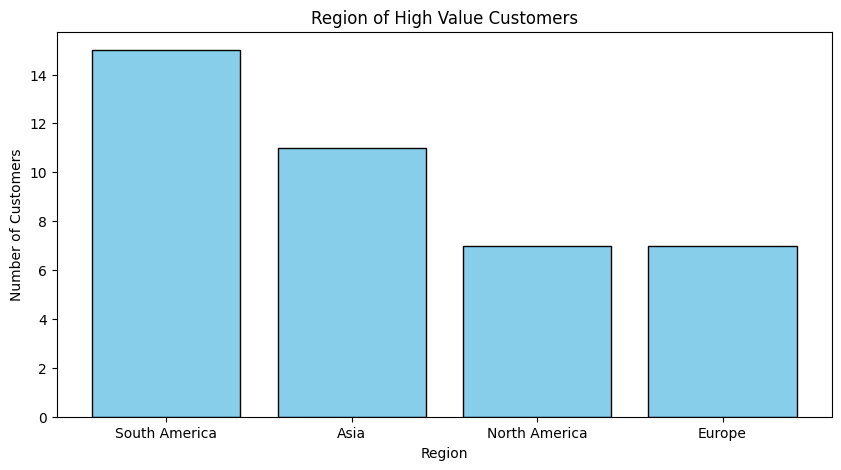

In [28]:
create_plot(x=region_hv.index, y=region_hv.values, plot_type="bar", xlabel="Region", ylabel="Number of Customers", title="Region of High Value Customers", color="skyblue")

In [29]:
ptc

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,ProductName,Category,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 8:30:27,1,459.86,459.86,SoundWave Smartwatch,Electronics,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 2:15:24,3,1379.58,459.86,SoundWave Smartwatch,Electronics,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,SoundWave Smartwatch,Electronics,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,SoundWave Smartwatch,Electronics,Joshua Hamilton,Asia,2024-11-11


In [30]:
ptc["TransactionDate"] = pd.to_datetime(ptc["TransactionDate"])

In [31]:
ptc

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,ProductName,Category,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,SoundWave Smartwatch,Electronics,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,SoundWave Smartwatch,Electronics,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,SoundWave Smartwatch,Electronics,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,SoundWave Smartwatch,Electronics,Joshua Hamilton,Asia,2024-11-11


In [34]:
ptc.sort_values(by=['CustomerID', 'TransactionDate'])
ptc['prev_purchase'] = ptc.groupby('CustomerID')['TransactionDate'].shift(1)
ptc['days_between'] = (ptc['TransactionDate'] - ptc['prev_purchase']).dt.days

In [35]:
ptc

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,ProductName,Category,CustomerName,Region,SignupDate,prev_purchase,days_between
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Andrea Jenkins,Europe,2022-12-03,NaT,NaN
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Brittany Harvey,Asia,2024-09-04,NaT,NaN
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Kathryn Stevens,Europe,2024-04-04,NaT,NaN
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,Travis Campbell,South America,2024-04-11,NaT,NaN
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,Timothy Perez,Europe,2022-03-15,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,SoundWave Smartwatch,Electronics,Jacob Holt,South America,2022-01-22,2024-04-06 09:26:36,200.0
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,SoundWave Smartwatch,Electronics,Mrs. Kimberly Wright,North America,2024-04-07,2024-03-23 08:29:57,72.0
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,SoundWave Smartwatch,Electronics,Tyler Haynes,North America,2024-09-21,2024-02-17 18:50:52,47.0
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,SoundWave Smartwatch,Electronics,Joshua Hamilton,Asia,2024-11-11,2024-01-31 09:08:09,242.0
